In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
import numpy as np
import scipy.integrate as integrate
from scipy.optimize import root
from scipy.constants import epsilon_0, mu_0
%matplotlib inline

# Branch points in a coplanar waveguide coupler
The coplanar waveguide is a long structure, where the waves propagate in one direction and are confined in the other two direction. In the following document we assume that the structure is infinite and translationally invariant in the propagation direction. This means that all cross-sections look completely the same.

We want to find the following characteristics of this structure:

$\phi(x,y)$, the electric potential

$\psi(x,y)$, the scalar magnetic potential

$\vec{E}(x,y) = -\nabla \phi(x,y)$, the electric field

$\vec{H}(x,y) = -\nabla \psi(x,y)$, the magnetic field

$\hat{C}$, the capacitance matrix of the two waveguides

$\hat{L}$, the inductance matrix of the two waveguides

First, we need to define the "special points" of the waveguide coupler cross-section. We define 5 geometric distances: the gap between central line and ground plane conductors of the waveguides ($s_1$ and $w_1$ for the first waveguide and $s_2$ and $w_2$ for the second waveguide). The distance between the adjacent gaps of the couplers is called $w_3$.

The following function defines the "branch points" of the future conformal transform. These points mark ends of metallization. We will denote them $B$, $C$, $D$, $E$, $F$, $G$, $H$, $I$ from left to right

In [2]:
# 2 coplanar waveguides on the real axis
def z_branch_points_cpw(s1,s2,w1,w2,w3):
    z_B = 0
    z_C = z_B+s2
    z_D = z_C+w2
    z_E = z_D+s2
    z_F = z_E+w3
    z_G = z_F+s1
    z_H = z_G+w1
    z_I = z_H+s1    
    return [np.complex(x) for x in [z_B, z_C, z_D, z_E, z_F, z_G, z_H, z_I]]

For conformal mapping, we shall use the convention $z=x+iy$. The coplanar waveguide coupler geometry is thus defined in the complex plane of the $z$ variable. For two relatively strongly coupled 50-Ohm lines on a silicon substrate we have the following geometry:

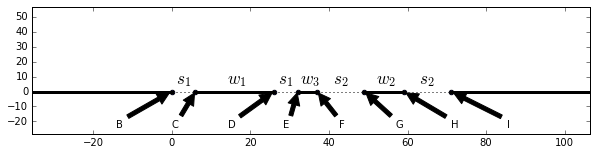

In [3]:
s1,s2,w1,w2,w3 = [12,6,10,20,5]
z_branch_points = z_branch_points_cpw(s1,s2,w1,w2,w3)

x = np.linspace(-(2*s2+2*s1+w1+w2+w3)*0.5,(2*s2+2*s1+w1+w2+w3)*1.5,251)
y = np.linspace(0, (np.max(x)-np.min(x))*0.4, 201)
z_B,z_C,z_D,z_E,z_F,z_G,z_H,z_I = z_branch_points

plt.figure(figsize=(10,5))
plt.clf()
axes=plt.subplot(2,1,1)
vertices = [i for i in z_branch_points]
lines = [(z_B-100,z_B,'-'),(z_B,z_C,':'),(z_C,z_D,'-'),(z_D,z_E,':'),(z_E,z_F,'-'),\
         (z_F,z_G,':'),(z_G,z_H,'-'),(z_H,z_I,':'),(z_I,z_I+100,'-')]
for z1,z2,style in lines:
    plt.plot([z1.real, z2.real], [z1.imag, z2.imag], color='black', linestyle=style, linewidth=(3 if style=='-' else 1) )

plt.xlim(np.min(x), np.max(x))
plt.ylim(-0.5*np.max(y), np.max(y))

plt.scatter([j.real for j in vertices], [j.imag for j in vertices])

annotations = ['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
annotation_positions = [(a*0.10+0.15, 0.05) for a in range(10)]
annotation_points = z_branch_points

for annotation, annotation_position, annotation_point in zip(annotations, annotation_positions, annotation_points):
    axes.annotate(annotation, xy=(annotation_point.real, annotation_point.imag), xytext=annotation_position, 
              xycoords='data',  textcoords='axes fraction', arrowprops={'facecolor':'black', 'shrink':0.05})
axes.annotate('$s_1$', xy=((z_B+z_C).real/2-2,5), fontsize='xx-large')
axes.annotate('$w_1$', xy=((z_C+z_D).real/2-2,5), fontsize='xx-large')
axes.annotate('$s_1$', xy=((z_D+z_E).real/2-2,5), fontsize='xx-large')
axes.annotate('$w_3$', xy=((z_E+z_F).real/2-2,5), fontsize='xx-large')
axes.annotate('$s_2$', xy=((z_F+z_G).real/2-2,5), fontsize='xx-large')
axes.annotate('$w_2$', xy=((z_G+z_H).real/2-2,5), fontsize='xx-large')
axes.annotate('$s_2$', xy=((z_H+z_I).real/2-2,5), fontsize='xx-large')

Since this structure is mirror-symmetric wrt the $x$ axis, it is enough to solve the problem in the upper half-plane. In a real structure the upper and lower half-planes usually have different dielectric constants. However one can still show that the analytical expression for the fields, potentials, capacitances and inductances remain the same up to a scaling factor for the coordinates.

The central problem we shall be solving is Laplace's equations for the electric and scalar magnetic potentials in the upper half-plane:
$$ \Delta \phi = 0 $$
$$ \Delta \psi = 0 $$
For the electrostatic potential $\phi$ the boundary conditions are that the potential on each conductor is constant. The field lines originate from charges, in our case - surface charges on the conductor. Since we want the conductors terminating at the point $B$ and $I$ to be the ground plane and the conductor $EF$ to be an effective ground for the two coplanar modes, we set
\begin{align}
&\phi(x,y)=0  && \mbox{if} && x<z_B &&\mbox{and} && y=0, \\
&\phi(x,y)=\phi_1  && \mbox{if} && z_C<x<z_D && \mbox{and}&& y=0, \\
&\phi(x,y)=0 &&  \mbox{if} && z_E<x<z_F && \mbox{and}&& y=0, \\
&\phi(x,y)=\phi_2  && \mbox{if} && z_F<x<z_G && \mbox{and}&& y=0, \\
&\phi(x,y)=0 &&  \mbox{if} && x>z_I && \mbox{and} && y=0, \\
\end{align}

These boundary conditions are incomplete: they would beonly complete if we define the value of $\phi$ or it's derivative on the boundary of the upper-half plane. But for our purposes this is fine.

The scalar magnetic potential is a less common concept. The idea behind it is that in the upper half-plane we don't have any volume density of currents and thus no curly magnetic fields. In absence of a curly component the magnetic field in a domain can be expressed as the antigradient of some function, which is called the scalar potential (analogous to the electric potential). Leaving out the details we suppose that the source of magnetic field lines is the external magnetic flux density in the gaps and that the boundary conditions for the scalar potential can be formulated as follows:

\begin{align}
&\psi(x,y)=\psi_1  && \mbox{if} && z_B<x<z_C && \mbox{and}&& y=0, \\
&\psi(x,y)=0 &&  \mbox{if} && z_D<x<z_E && \mbox{and}&& y=0, \\
&\psi(x,y)=\psi_2  && \mbox{if} && z_F<x<z_G && \mbox{and}&& y=0, \\
\end{align}
Is in the former case, these boundary conditions are incomplete, but we'll try to find a conformal transform just using these boundary conditions and see what happens.

# Conformal transformation of the planar structure to a rectangle
The whole idea of conformal mapping resides on two main pillars: the Euler-d'Alambert condition and the Schwarz-Cristoffel formula.
## Euler-d'Alambert condition
Suppose we have some analytical function of a complex variable, $w(z)$. Analytical means it has a derivative in some domain $\Omega \subset \mathbb{C}$: 

\begin{equation} 
w'(z) = \lim_{\Delta z \to 0} \frac{w(z+\Delta z) - w(z)}{\Delta z} 
\end{equation}

For the limit to exist, it must be equal independent from the argument of $\Delta z$, so a function of two real variables $x$ and $y$, $w(x+iy)$ must satisfy the Euler-d'Alambert condition

\begin{equation} 
\frac{\partial w}{\partial x} = \lim_{\Delta x \to 0} \frac{w(z+\Delta x) - w(z)}{\Delta x} = \lim_{\Delta y \to 0} \frac{w(z+i\Delta y) - w(z)}{i\Delta y} = -i\frac{\partial w}{\partial y}
\end{equation}

Appyling this rule twice, we arrive at

\begin{equation}
\frac{\partial}{\partial x}\frac{\partial w}{\partial x} = \frac{\partial}{\partial x}(-i)\frac{\partial w}{\partial y} = 
(-i)^2\frac{\partial}{\partial y}\frac{\partial w}{\partial y}
\end{equation}

which translates to the fact than an analytical function of a complex variable is in fact a solution to Laplace's equation (also called a harmonic function) of two real variables:

\begin{equation}
\frac{\partial^2 w}{\partial x^2}+\frac{\partial^2 w}{\partial y^2}=0
\end{equation}

What we want to to find an analytic function $w(z)$ of which either the real or imaginary part fits to our boundary conditions.
## Schwarz–Christoffel mapping
How do we find such a analytic function? The Schwarz-Cristoffel formula is a powerful tool to perform a conformal mapping of the real axis onto the edges of a simple polygon.
The Schwarz-Cristoffel formula is following:
\begin{equation}
w(z) = \int_{0}^{z}\prod_{i}(z-z_i)^{\alpha_i/\pi-1}\mathrm{d}z
\end{equation}
$z_i$ are the coordinates of the points on the real axis that are transformed into the verteces of the polygon and $\alpha_i$ are the angles at these verteces. Why does this work? Let's take the derivative of the formula in differential form and look at its argument:
\begin{equation}
\operatorname{Arg}\mathrm{d} w = \sum_{i}(\alpha_i/\pi-1)\operatorname{Arg}(z-z_i)+\operatorname{Arg}\mathrm{d}z
\end{equation}
As we are moving along the positive direction of the real axis, $\operatorname{Arg}\mathrm{d}z$ remains zero. As long as all $z_i$ are real, $\operatorname{Arg}(z-z_i)$ is either $\pi$ or $0$, depending on whether $z$ has passed $z_i$ of not. While $z_i<z<z_{i+1}$, the value of $\operatorname{Arg}\mathrm{d} w$ is constant: intervals between the points $z_i$ on the real axis are transformed into straight lines. When passing one of the points $z_i$, the argument becomes $\alpha_i-\pi$ larger, which corresponds to a vertex in $w$-space where the angle is equal to $\alpha_i$.

Our transform for the CPW coupler looks in general like this:
\begin{equation}
w(z) =\int_{0}^{z}\frac{(z-z_{F'})(z-z_{H'})}{(z-z_B)^{1/2}(z-z_C)^{1/2}(z-z_D)^{1/2}(z-z_E)^{1/2}(z-z_F)^{1/2}(z-z_G)^{1/2}(z-z_H)^{1/2}(z-z_I)^{1/2}}\mathrm{d}z
\end{equation}

Non-integer powers of polynomials are multivalued functions of their complex argument. At the zero of the argument of these functions, they have a so-called "branch point". Thus in our formula $z_B$, $z_C$, $z_D$, $z_E$, $z_F$, $z_G$, $z_H$, $z_I$ are branch points of the function under the integral and $z_{F'}$ and $z_{H'}$ are its zeros.
We will need $z_{F'}$ and $z_{H'}$ a bit later. Their pupose in thoroughly explained in https://arxiv.org/ftp/arxiv/papers/1511/1511.02639.pdf

# Calculate the confromal transform on all branch points
Our Schwarz-Christoffel integral looks awful. It has a degree-2 polynomial in the numerator and the sqaure root of a degree-8 polynomial in the denumerator. In case it can be simplified at least to an at most degree-4 polynomial under the square root, it could be written as an elliptic integral. We won't try to simplify it and shall evaluate w(z) numerically.
Numerical integration has a problem here: at the branch points the integrand diverges, and standard numerical integration routines typically fail. To curcumvent this issue, we can apply integration by parts:

\begin{equation}
w(z_1)-w(z_0) = \int_{z_0}^{z_1} u(z)\frac{\mathrm{d}v}{\mathrm{d}z} \mathrm{d}z= u(z_1)v(z_1) - u(z_0)v(z_0)-\int_{z_0}^{z_1} \frac{\mathrm{d}u}{\mathrm{d}z}v(z) \mathrm{d}z
\end{equation}

We select two of the eight branch points and call them $j$ and $k$. All the other branch points are indexed with $i$ and the two zeros are indexed with $l$. As the part $u(z)$ and $v(z)$ we select
\begin{equation}
u(z) = \prod_{l}(z-z_l)\prod_{i \neq j,k}(z-z_i)^{-1/2}
\end{equation}
\begin{equation}
v(z) = \operatorname{Log}\left(z-\frac{z_j+z_k}{2}+(z-z_j)^{1/2}(z-z_k)^{1/2}\right)
\end{equation}
with the derivatives
\begin{equation}
u'(z) = \sum_{l} \prod_{l' \neq l}(z-z_l')\prod_{i \neq j,k}(z-z_i)^{-1/2} - \sum_{i \neq j,k} (z-z_i)^{-1}\prod_{l}(z-z_l)\prod_{i' \neq j,k} (z-z_{i'})^{1-2}
\end{equation}
\begin{equation}
v'(z) = (z-z_j)^{-1/2}(z-z_k)^{-1/2}
\end{equation}

The following calculates the conformal transform exactly this way. This helps use mitigate two singularities of 8, which is not bad. Actually, we could use a formula that makes only one singularity go away, since it is only useful near the singularities anyway.

In [4]:
def conformal_transform_difference_by_parts(z0,z1,branch_point1,branch_point2,branch_points,zero_points):
    # 1) solving integral part (positive)
    f1 = lambda z: np.log(z-(branch_points[branch_point1] + branch_points[branch_point2])/2 + \
                       np.sqrt((z-branch_points[branch_point1])*(z-branch_points[branch_point2]))) * \
                       np.prod([z-zero_point for zero_point in zero_points]) / \
                       np.prod([np.sqrt(z-branch_point) for branch_point_id, branch_point \
                       in enumerate(branch_points) if branch_point_id not in [branch_point1, branch_point2]])
    f2 = lambda z: np.log(z-(branch_points[branch_point1] + branch_points[branch_point2])/2 + \
                       np.sqrt((z-branch_points[branch_point1])*(z-branch_points[branch_point2]))) * \
                       np.sum([np.prod([(z-zero_point) for zero_point_id, zero_point in enumerate(zero_points) \
                       if zero_point_id != diff_zero_point_id])/ \
                       np.prod([np.sqrt(z-branch_point) for branch_point_id, branch_point \
                       in enumerate(branch_points) if branch_point_id not in [branch_point1, branch_point2]]) \
                       for diff_zero_point_id, diff_zero_point in enumerate(zero_points)]+ \
                       [np.prod([z-zero_point for zero_point in zero_points]) / \
                       np.prod([np.sqrt(z-branch_point) for branch_point_id, branch_point \
                       in enumerate(branch_points) if branch_point_id not in [branch_point1, branch_point2]]) / \
                       (z-diff_branch_point)*(-0.5) for diff_branch_point_id, diff_branch_point in enumerate(branch_points) \
                       if diff_branch_point_id not in [branch_point1, branch_point2] ])
    
    integral_part = f1(z1)-f1(z0)
    numerical_part = np.complex(*tuple(integrate.quad(lambda t: f2(t*(z1-z0)+z0).real, 0, 1)))+1j*np.complex(*tuple(integrate.quad(lambda t: f2(t*(z1-z0)+z0).imag, 0, 1)))
    
    return integral_part - (z1-z0)*numerical_part   

For the following code we will need the values of the conformal transform at the zeros and branch points of the integrand. An easy way of doing that is calculating the conformal transform difference between neighboring branch points with the formula above and then putting the differences together.

In [5]:
def w_special_points(z_branch_points, z_zero_points):
    w_branch_points = []
    for branch_point_id, z_branch_point in enumerate(z_branch_points):
        if branch_point_id==0:
            w_branch_points.append(0)
        else:            
            w_branch_points.append(w_branch_points[branch_point_id-1] + \
            conformal_transform_difference_by_parts(\
            z_branch_points[branch_point_id-1],z_branch_points[branch_point_id],\
            branch_point_id-1,branch_point_id,z_branch_points,z_zero_points))
    
    w_zero_points = []        
    for zero_point_id, z_zero_point in enumerate(z_zero_points):
        nearest_branch_points = np.argsort(np.abs(np.asarray(z_branch_points)-z_zero_point))[:2]
        w_zero_points.append(w_branch_points[nearest_branch_points[0]] + \
            conformal_transform_difference_by_parts(\
                z_branch_points[nearest_branch_points[0]],\
                z_zero_point,\
                nearest_branch_points[0],\
                nearest_branch_points[1],\
                z_branch_points,
                z_zero_points))
    return w_branch_points, w_zero_points

We are ready to see how the conformal transform works. For $z_F'$ and $z_H'$ we shall for now take some random values between $z_F$ and $z_G$, and $z_H$ and $z_I$.

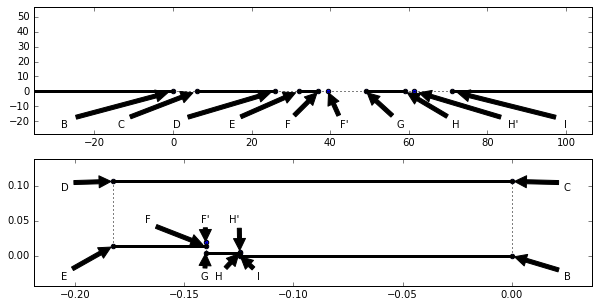

In [6]:
z_F1 = z_F*0.8+z_G*0.2
z_H1 = z_H*0.8+z_I*0.2
z_zero_points = [z_F1, z_H1]
z_branch_points = z_branch_points_cpw(s1,s2,w1,w2,w3)
w_branch_points, w_zero_points = w_special_points(z_branch_points, z_zero_points)
z_B,z_C,z_D,z_E,z_F,z_G,z_H,z_I = z_branch_points
w_B,w_C,w_D,w_E,w_F,w_G,w_H,w_I = w_branch_points
z_F1,z_H1 = z_zero_points
w_F1,w_H1 = w_zero_points

x = np.linspace(-(2*s2+2*s1+w1+w2+w3)*0.5,(2*s2+2*s1+w1+w2+w3)*1.5,251)
y = np.linspace(0, (np.max(x)-np.min(x))*0.4, 201)

plt.figure(figsize=(10,5))
plt.clf()
axes=plt.subplot(2,1,1)
vertices = [i for i in z_zero_points] + [i for i in z_branch_points]
lines = [(z_B-100,z_B,'-'),(z_B,z_C,':'),(z_C,z_D,'-'),(z_D,z_E,':'),(z_E,z_F,'-'),\
         (z_F,z_F1,':'),(z_F1,z_G,':'),(z_G,z_H,'-'),(z_H,z_H1,':'),(z_H1,z_I,':'),(z_I,z_I+100,'-')]
for z1,z2,style in lines:
    plt.plot([z1.real, z2.real], [z1.imag, z2.imag], color='black', linestyle=style, linewidth=(3 if style=='-' else 1))

plt.xlim(np.min(x), np.max(x))
plt.ylim(-0.5*np.max(y), np.max(y))

plt.scatter([j.real for j in vertices], [j.imag for j in vertices])

annotations = ['B', 'C', 'D', 'E', 'F', 'F\'', 'G', 'H', 'H\'', 'I']
annotation_positions = [(a*0.10+0.05, 0.05) for a in range(10)]
annotation_points = [z_B,z_C,z_D,z_E,z_F,z_F1,z_G,z_H,z_H1,z_I]

for annotation, annotation_position, annotation_point in zip(annotations, annotation_positions, annotation_points):
    axes.annotate(annotation, xy=(annotation_point.real, annotation_point.imag), xytext=annotation_position, 
              xycoords='data',  textcoords='axes fraction', arrowprops={'facecolor':'black', 'shrink':0.05})
    
axes=plt.subplot(2,1,2)
vertices = [i for i in w_zero_points] + [i for i in w_branch_points]
lines = [(w_B,w_C,':'),(w_C,w_D,'-'),(w_D,w_E,':'),(w_E,w_F,'-'),\
         (w_F,w_F1,':'),(w_F1,w_G,':'),(w_G,w_H,'-'),(w_H,w_H1,':'),(w_H1,w_I,':'),(w_I,w_B,'-')]
for z1,z2,style in lines:
    plt.plot([z1.real, z2.real], [z1.imag, z2.imag], color='black', linestyle=style, linewidth=(3 if style=='-' else 1))
    
plt.scatter([j.real for j in vertices], [j.imag for j in vertices])

plt.xlim([w_E.real-(w_B.real-w_E.real)*0.2, w_B.real+(w_B.real-w_E.real)*0.2])
plt.ylim([w_B.imag-(w_C.imag-w_B.imag)*0.4, w_C.imag+(w_C.imag-w_B.imag)*0.3])

annotations = ['B', 'C', 'D', 'E', 'F', 'F\'', 'G', 'H', 'H\'', 'I']
annotation_positions = [(0.95, 0.05), (0.95, 0.75), (0.05, 0.75), (0.05, 0.05), (0.200, 0.50), \
                        (0.30, 0.50), (0.30, 0.05), (0.325, 0.05), (0.35, 0.50), (0.4, 0.05),]
annotation_points = [w_B,w_C,w_D,w_E,w_F,w_F1,w_G,w_H,w_H1,w_I]

for annotation, annotation_position, annotation_point in zip(annotations, annotation_positions, annotation_points):
    axes.annotate(annotation, xy=(annotation_point.real, annotation_point.imag), xytext=annotation_position, 
              xycoords='data',  textcoords='axes fraction', arrowprops={'facecolor':'black', 'shrink':0.05})

On the branch points, the transform of the real axis turns by a right angle counter-clockwise. On the zero points, in rotates by $2\pi$ and goes in the reverse direction.

The transform $w(z)$ is already half of the solution of the problem: If we look at its imaginary part, $\operatorname{Im}w(z)$, it is constant on the conductors. This is make it a good candidate for $\phi(x,y)$.
However we wanted $\phi(x,y)=0$ on $z_E<x<z_F, y=0$, so that the central conductor is grounded. Apart from that, it would be nice if we could scale $\frac{\phi_1}{\phi_2}$. For these purposes, we can vary $z_F'$ and $z_H'$ (they need to remain real, however).

# Find the zero points of the transform derivative from the potential of the ports

If we want, for example, $\phi_2=0$ (which is useful for determining the capacitance matrix), we would need to find $z_F'$ and $z_H'$ from the equations
\begin{equation}
\operatorname{Im}w(z_E)=0
\end{equation}
\begin{equation}
\operatorname{Im}w(z_G)=0
\end{equation}

In [7]:
def find_zero_points(z_branch_points, z_zero_points_initial, z_zero_point_types, constraint_point_ids, constraint_types):
    def constraint(t_zero_points):
        w_branch_points, w_zero_points = w_special_points(z_branch_points, \
        [t if point_type=='real' else 1j*t for t,point_type in zip(t_zero_points, z_zero_point_types)]) 
        z_B,z_C,z_D,z_E,z_F,z_G,z_H,z_I = z_branch_points           
        w_B,w_C,w_D,w_E,w_F,w_G,w_H,w_I = w_branch_points
        constraint_values = \
        [w_branch_points[constraint_point_id[0]].real-w_branch_points[constraint_point_id[1]].real \
         if constraint_types[constraint_id] == 'real' else \
         w_branch_points[constraint_point_id[0]].imag-w_branch_points[constraint_point_id[1]].imag \
         for constraint_id, constraint_point_id in enumerate(constraint_point_ids)]
        return constraint_values
        
    return root(constraint, z_zero_points_initial).x

# Derivative of the conformal transform (defines the electric and magnetic fields)
It turns out that the real part of $w(z)$ makes a good candidate for $\psi(x,y)$, too. The corresponding electric and magnetic fields can be calculated as their derivatives, which is even easier than the potentials, since we don't need to evaulate the integral for them.

In [8]:
def conformal_transform_derivative(z,z_branch_points,z_zero_points):
    result = 1
    for branch_point_id, branch_point in enumerate(z_branch_points):
        result /= np.sqrt(z-branch_point)
    for zero_point_id, zero_point in enumerate(z_zero_points):
        result *= (z-zero_point)
    return result

# Defining geometric properties of the coplanar waveguide coupler
Let's for example take two 50-Ohm lines with different cross-section scales.

In [9]:
w = 10
s = 6
s1 = 6
s2 = 12
w1 = 10
w2 = 20
w3 = 5

# Evaluating the conformal transform special points (zeros and branch points) if when of the nodes has a potential and all others are grounded (z-space & w-space)

In [10]:
z_branch_points = z_branch_points_cpw(s1,s2,w1,w2,w3)
z_zero_points_initial = [(z_branch_points[4]+z_branch_points[5]).real/2, \
                         (z_branch_points[6]+z_branch_points[7]).real/2]
z_zero_points = find_zero_points(z_branch_points, z_zero_points_initial, ['real', 'real'], \
                                        [(3,0),(5,0)], ['imag', 'imag'])
w_branch_points, w_zero_points = w_special_points(z_branch_points, z_zero_points)
z_B,z_C,z_D,z_E,z_F,z_G,z_H,z_I = z_branch_points
w_B,w_C,w_D,w_E,w_F,w_G,w_H,w_I = w_branch_points
z_F1,z_H1 = z_zero_points
w_F1,w_H1 = w_zero_points

# plotting conformal transform & fields

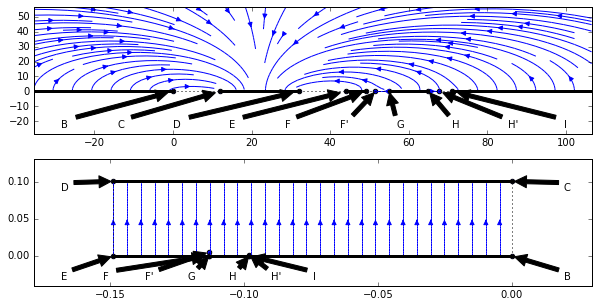

In [11]:
x = np.linspace(-(2*s2+2*s1+w1+w2+w3)*0.5,(2*s2+2*s1+w1+w2+w3)*1.5,251)
y = np.linspace(0, (np.max(x)-np.min(x))*0.4, 201)

plt.figure(figsize=(10,5))
plt.clf()
axes=plt.subplot(2,1,1)
vertices = [i for i in z_zero_points] + [i for i in z_branch_points]
lines = [(z_B-100,z_B,'-'),(z_B,z_C,':'),(z_C,z_D,'-'),(z_D,z_E,':'),(z_E,z_F,'-'),\
         (z_F,z_F1,':'),(z_F1,z_G,':'),(z_G,z_H,'-'),(z_H,z_H1,':'),(z_H1,z_I,':'),(z_I,z_I+100,'-')]
for z1,z2,style in lines:
    plt.plot([z1.real, z2.real], [z1.imag, z2.imag], color='black', linestyle=style, linewidth=(3 if style=='-' else 1))

plt.xlim(np.min(x), np.max(x))
plt.ylim(-0.5*np.max(y), np.max(y))

plt.scatter([j.real for j in vertices], [j.imag for j in vertices])

[xm,ym] = np.meshgrid(x,y)
um = conformal_transform_derivative(xm+1j*ym,z_branch_points,z_zero_points).real
vm = conformal_transform_derivative(xm+1j*ym,z_branch_points,z_zero_points).imag
wm = np.zeros(um.shape, dtype=np.complex)
plt.streamplot(x,y,vm,um)

annotations = ['B', 'C', 'D', 'E', 'F', 'F\'', 'G', 'H', 'H\'', 'I']
annotation_positions = [(a*0.10+0.05, 0.05) for a in range(10)]
annotation_points = [z_B,z_C,z_D,z_E,z_F,z_F1,z_G,z_H,z_H1,z_I]

for annotation, annotation_position, annotation_point in zip(annotations, annotation_positions, annotation_points):
    axes.annotate(annotation, xy=(annotation_point.real, annotation_point.imag), xytext=annotation_position, 
              xycoords='data',  textcoords='axes fraction', arrowprops={'facecolor':'black', 'shrink':0.05})
    
    
axes=plt.subplot(2,1,2)
vertices = [i for i in w_zero_points] + [i for i in w_branch_points]
lines = [(w_B,w_C,':'),(w_C,w_D,'-'),(w_D,w_E,':'),(w_E,w_F,'-'),\
         (w_F,w_F1,':'),(w_F1,w_G,':'),(w_G,w_H,'-'),(w_H,w_H1,':'),(w_H1,w_I,':'),(w_I,w_B,'-')]
for z1,z2,style in lines:
    plt.plot([z1.real, z2.real], [z1.imag, z2.imag], color='black', linestyle=style, linewidth=(3 if style=='-' else 1))
    
plt.scatter([j.real for j in vertices], [j.imag for j in vertices])

wx = np.linspace(w_E.real, w_B.real, 251)
wy = np.linspace(w_B.imag, w_C.imag, 101)
wxm,wym = np.meshgrid(wx,wy)
wvm = 0*np.ones(wxm.shape)
wum = 1*np.ones(wxm.shape)
plt.streamplot(wxm,wym,wvm,wum)

plt.xlim([w_E.real-(w_B.real-w_E.real)*0.2, w_B.real+(w_B.real-w_E.real)*0.2])
plt.ylim([w_B.imag-(w_C.imag-w_B.imag)*0.4, w_C.imag+(w_C.imag-w_B.imag)*0.3])

annotations = ['B', 'C', 'D', 'E', 'F', 'F\'', 'G', 'H', 'H\'', 'I']
annotation_positions = [(0.95, 0.05), (0.95, 0.75), (0.05, 0.75), (0.05, 0.05), (0.125, 0.05), \
                        (0.20, 0.05), (0.275, 0.05), (0.35, 0.05), (0.425, 0.05), (0.5, 0.05),]
annotation_points = [w_B,w_C,w_D,w_E,w_F,w_F1,w_G,w_H,w_H1,w_I]

for annotation, annotation_position, annotation_point in zip(annotations, annotation_positions, annotation_points):
    axes.annotate(annotation, xy=(annotation_point.real, annotation_point.imag), xytext=annotation_position, 
              xycoords='data',  textcoords='axes fraction', arrowprops={'facecolor':'black', 'shrink':0.05})

# Putting the potential on each of the waveguides and evaluating the capacitance matrix vector
The elements of the capacitance matrix $C_{ij}$ are defined as the charge induced on on the conductor $i$ if the conductor $j$ is given a unit potential while all other conductors are grounded:
\begin{equation}
q_i=C_{ij}\phi_j
\end{equation}
Similarly, the inductance matrix elements $L_{ij}$ are defined by the flux through the loop $i$ when a unit current is circulating in the loop $j$:
\begin{equation}
\Phi_i=L_{ij}I_j
\end{equation}
Since we are dealing with a 2D cross-section, we have:
* conductor cross-section instead of loops and conductors (1D cross-section of 2D surfaces),
* linear charge density instead of charge
* linear flux density instead of flux
* linear capactance density instead of capacitance
* linear inductance density instead of inductance

In order to get the "real thing" we should multiply the linear densities by the length of the CPW.

The following code solves the equations of $z_F'$ and $z_H'$ and fills in the first column-vectors of $C_{ij}$ with $(\frac{\operatorname{Re}w(z_C)-\operatorname{Re}w(z_D)}{\operatorname{Im}w(z_C)}, \frac{\operatorname{Re}w(z_G)-\operatorname{Re}w(z_H)}{\operatorname{Im}w(z_C)})$. After that, it exchanges the first CPW with the second one, solves again and fills in the second column-vectors. The dimensionless capacitance and inductance matrices are inverses of each other: $L_{ij} = C^{-1}_{ij}$

In [12]:
z_branch_points = z_branch_points_cpw(s1,s2,w1,w2,w3)
z_zero_points_initial = [(z_branch_points[4]+z_branch_points[5]).real/2, \
                         (z_branch_points[6]+z_branch_points[7]).real/2]
z_zero_points = find_zero_points(z_branch_points, z_zero_points_initial, ['real', 'real'], \
                                        [(3,0),(5,0)], ['imag', 'imag'])
w_branch_points, w_zero_points = w_special_points(z_branch_points, z_zero_points)
w_B,w_C,w_D,w_E,w_F,w_G,w_H,w_I = w_branch_points
c1_ = [(w_C.real-w_D.real)/(w_C.imag-w_B.imag), (w_G.real-w_H.real)/(w_C.imag-w_B.imag)]

z_branch_points = z_branch_points_cpw(s2,s1,w2,w1,w3)
z_zero_points_initial = [(z_branch_points[4]+z_branch_points[5]).real/2, \
                         (z_branch_points[6]+z_branch_points[7]).real/2]
z_zero_points = find_zero_points(z_branch_points, z_zero_points_initial, ['real', 'real'], \
                                        [(3,0),(5,0)], ['imag', 'imag'])
w_branch_points, w_zero_points = w_special_points(z_branch_points, z_zero_points)
w_B,w_C,w_D,w_E,w_F,w_G,w_H,w_I = w_branch_points
c2_ = [(w_G.real-w_H.real)/(w_C.imag-w_B.imag), (w_C.real-w_D.real)/(w_C.imag-w_B.imag)]

C_dimensionless = np.asarray([c1_, c2_])
L_dimensionless = np.linalg.inv(np.asarray(C_dimensionless))

# Converting dimensionless capacitance and inductance to SI and multipling by relative permittivities
The effective relative permittivity of a dielectric substrate is given by
\begin{equation}
\epsilon_{\mathrm{eff}}=\frac{\sqrt{\epsilon_{xx}\epsilon_{yy}}+1}{2}
\end{equation}
Since we have only solved Laplace's equation in the upper half-plane, we have overestimated the inductance and underestimated the actual capacitance by a factor of two. The resulting capacitance and inductance matrices in SI units are caluclated below

In [13]:
epsilon_eff = 6.45
C_l = 2*C_dimensionless*epsilon_0*epsilon_eff
L_l = L_dimensionless*mu_0/2
coupling_matrix = L_dimensionless*mu_0/2/np.sqrt(epsilon_0*mu_0*epsilon_eff)

# Mutual linear capacitance density matrix, F/m

In [14]:
C_l

array([[  1.68853488e-10,  -1.69303012e-11],
       [ -1.69303011e-11,   1.68187296e-10]])

# Mutual linear inductance density matrix, Hn/m

In [15]:
L_l

array([[  4.29352441e-07,   4.32200666e-08],
       [  4.32200665e-08,   4.31053112e-07]])

# Mutual "impedance" matrix, Ω
This matrix is essentially the linear inductance matrix in resistance units.

In [17]:
coupling_matrix

array([[ 50.68212109,   5.10183345],
       [  5.10183344,  50.88287366]])